In [11]:
import tweepy
import mysql.connector

In [12]:
#consumer key
api_key = 'y9iWJr6uclwz4x4iVKKaBBDjN'
#consumer secret key
api_key_secret = '2zbaVyfZcuiggQ89eVzZRD4QbSDBhV0peQopOM4nWx7lcj8KNU'
#access token
access_token = '1540070809645076482-abk4zdsalno8dGJL2i4gePgeEy1Mmy'
#access_token_secret
access_token_secret = 'AYrDYneaMcglqJOQSjr24KYGuOkrPnVXeW8slSAzMqjaG'

#connecting to tweepy
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


In [13]:
#connecting to mysql localhost
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="harish",
  database="Assignments",
  auth_plugin='mysql_native_password'
)

In [14]:
mycursor = mydb.cursor()

user_ids = [13211, 13214, 11111, 12363, 12352, 12789, 13211, 13212, 13213, 13214]

#looping over sample userids
for user_id in user_ids:
    user = api.get_user(user_id=user_id)
    screen_name = user.screen_name
    username = user.name
    user_location = user.location
    user_description = user.description
    follows_count = user.followers_count
    friends_count = user.friends_count
    statuses_count = user.statuses_count
    user_url = user.url
    # Insert query to insert the reocrds
    sql = "INSERT INTO twitter_account_holders(screenName, userName, userLocation, userDescription, followsCount, friendsCount, statusesCount, userUrl) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
    val = (screen_name, username, user_location, user_description, follows_count, friends_count, statuses_count, user_url)
    # Executing the query
    mycursor.execute(sql, val)
    
    mydb.commit()
    
print("Records instered successfully")

Records instered successfully


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Reading the csv file 
df = pd.read_csv("assignment_4_property_tax_report_2019.csv")
df.dtypes

PID                            object
LEGAL_TYPE                     object
FOLIO                           int64
LAND_COORDINATE                 int64
ZONE_NAME                      object
ZONE_CATEGORY                  object
LOT                            object
BLOCK                          object
PLAN                           object
DISTRICT_LOT                   object
FROM_CIVIC_NUMBER              object
TO_CIVIC_NUMBER               float64
STREET_NAME                    object
PROPERTY_POSTAL_CODE           object
NARRATIVE_LEGAL_LINE1          object
NARRATIVE_LEGAL_LINE2          object
NARRATIVE_LEGAL_LINE3          object
NARRATIVE_LEGAL_LINE4          object
NARRATIVE_LEGAL_LINE5          object
CURRENT_LAND_VALUE            float64
CURRENT_IMPROVEMENT_VALUE     float64
TAX_ASSESSMENT_YEAR           float64
PREVIOUS_LAND_VALUE           float64
PREVIOUS_IMPROVEMENT_VALUE    float64
YEAR_BUILT                    float64
BIG_IMPROVEMENT_YEAR          float64
TAX_LEVY    

In [7]:
df_cleaned = df.dropna(subset=['YEAR_BUILT'])
grouped_data = df_cleaned.groupby('YEAR_BUILT')['PID'].count().reset_index()

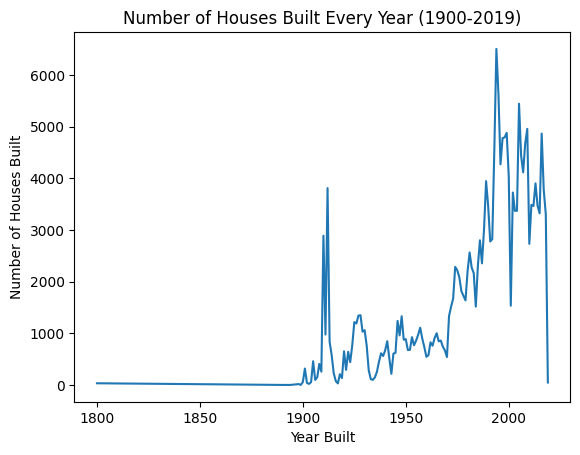

In [8]:
#Line plot graph
plt.plot(grouped_data['YEAR_BUILT'], grouped_data['PID'])
plt.title('Number of Houses Built Every Year (1900-2019)')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses Built')
plt.show()


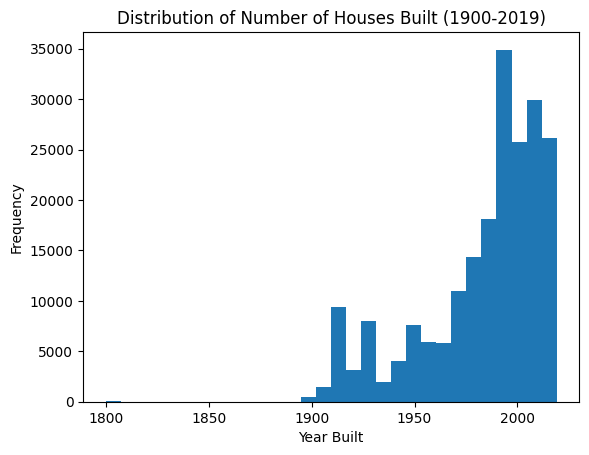

In [8]:
#Histogram
plt.hist(df_cleaned['YEAR_BUILT'], bins=30)
plt.title('Distribution of Number of Houses Built (1900-2019)')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()


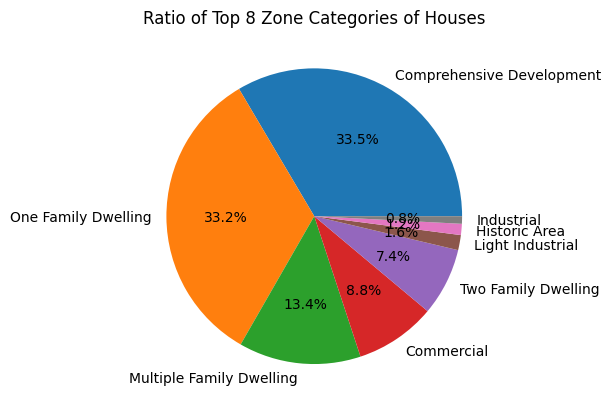

In [9]:
# Pie chart
top_zones = df['ZONE_CATEGORY'].value_counts().nlargest(8)
plt.pie(top_zones.values, labels=top_zones.index, autopct='%1.1f%%')
plt.title('Ratio of Top 8 Zone Categories of Houses')
plt.show()


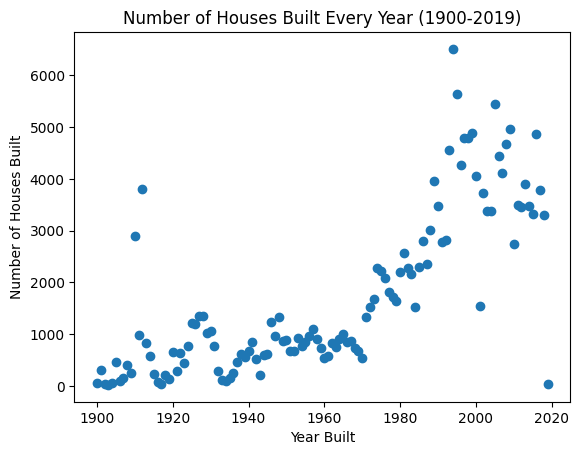

In [10]:

# Scatter plot
grouped_data = grouped_data[grouped_data['YEAR_BUILT'] >= 1900]
plt.scatter(grouped_data['YEAR_BUILT'], grouped_data['PID'])
plt.title('Number of Houses Built Every Year (1900-2019)')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses Built')
plt.show()